In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [11]:
var = pd.read_csv('carprices.csv')
var = var.rename(columns=({'Car Model':'Car_Model'}))
var = var.rename(columns=({'Sell Price($)':'Sell_Price'}))
var = var.rename(columns=({'Age(yrs)':'Age_yrs'}))
var

,Car_Model,Mileage,Sell_Price,Age_yrs
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [12]:
var1 = pd.get_dummies(var.Car_Model)
var1

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [21]:
New = pd.concat([var,var1], axis='columns')
New = New.drop(['Car_Model','Audi A5'], axis ='columns')
New

,Mileage,Sell_Price,Age_yrs,BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [24]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(New[['Mileage','Age_yrs','BMW X5','Mercedez Benz C class']],New.Sell_Price)

LinearRegression()

In [25]:
model.predict([[45000,4,0,1]])

C:\Users\jhapr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [26]:
model.predict([[86000,7,1,0]])

C:\Users\jhapr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [29]:
model.score(New[['Mileage','Age_yrs','BMW X5','Mercedez Benz C class']],New.Sell_Price)

0.9417050937281082

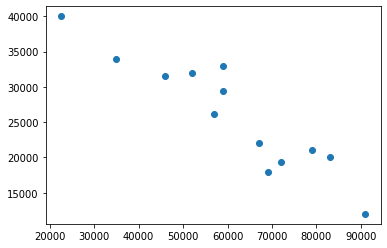

In [30]:
plt.scatter(var.Mileage, var.Sell_Price)

In [33]:
model.coef_
model.intercept_

56523.085231274956

In [34]:
-3.70122094e-01* 86000 -1.33245363e+03*7 -4.28466659e+03*1 +  2.45354074e+03*0 + 56523.085231274956

11080.74314727496

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var.Car_Model = le.fit_transform(var.Car_Model)
X = var[['Car_Model','Mileage','Age_yrs']].values
Y = var.Sell_Price.values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [134]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Car_Model', OneHotEncoder(),[0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [135]:
model2 = linear_model.LinearRegression()
model2.fit(X,Y)


LinearRegression()

In [137]:
model2.predict([[0,1,45000,4]])

array([36991.31721062])

In [140]:
import joblib
joblib.dump(model2,'model_OHE')

['model_OHE']

In [144]:
import pickle
with open('model_dummy','wb') as file:
    pickle.dump(model,file)